In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
import random

params = {"xtick.labelsize" : 18,
          "ytick.labelsize":18,
          "axes.titlesize":18,
          "axes.labelsize":20,
          "legend.fontsize":18,
          "legend.title_fontsize":22,
          "figure.titlesize": 24
          }
pylab.rcParams.update(params)

random.seed(42)

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the csv data")
uploadedData = files.upload()
data_csv_filename = list(uploadedData)[0]

Please load the csv data


Saving data_HW3 (3).csv to data_HW3 (3).csv


In [ ]:
# a. Data Loading
dataset = pd.read_csv(data_csv_filename)
dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'contamination_level'],
      dtype='object')

In [ ]:
dataset.head()

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,contamination_level
0,733,31,F,80.8,O-,"('11.93381', '79.82979')",6,6,0.7,5,...,5.198138,108.036437,188.801048,4.794950,8.763805,1.664061,10.239285,2.399066,-253.987710,0.327102
1,382,29,F,63.0,O+,"('51.67822', '33.9162')",1,9,NaN,11,...,5.721030,-106.885392,9.936129,1.700335,7.266007,3.071229,5.916312,2.860534,154.620882,0.196443
2,1164,44,F,74.2,O+,"('60.02427', '30.28491')",2,10,1.5,3,...,4.364061,8.145824,46.805718,5.640838,8.647514,3.649969,1.185047,4.834962,106.257677,0.077727
3,897,9,M,31.8,O-,"('51.08468', '7.11393')",3,9,0.5,8,...,0.852508,63.603672,86.119489,8.245630,8.559101,4.537883,0.303430,1.486220,81.953230,0.172861
4,1187,18,F,42.4,A-,"('38.45598', '48.87498')",0,8,0.2,4,...,3.993688,-46.825379,191.552737,6.121042,6.202387,2.250050,8.499374,4.053463,-85.240560,0.367014


In [ ]:
# b. train-test splitting same as HW1 random state
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, train_size=0.8, random_state=74+40)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1000, 24)
(250, 24)


In [ ]:
# prepare.py as submitted in HW1

import sklearn

## Normalizers

def StandardNormalize(df, columns):
  scaler = sklearn.preprocessing.StandardScaler()
  scaler.fit(df[columns])
  df[columns] = scaler.transform(df[columns])

def MinMaxNormalize(df, columns):
  scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
  scaler.fit(df[columns])
  df[columns] = scaler.transform(df[columns])


### Prepare Data
def prepare_data(training_data, new_data):
  prepared_data = new_data.copy()

  #Replace NaN values for household_income:
  median = training_data["household_income"].median()
  prepared_data["household_income"] = prepared_data["household_income"].fillna(median)

  #Prepare Blood Types
  prepared_data["SpecialProperty"] = prepared_data["blood_type"].isin(["O+", "B+"])
  prepared_data = prepared_data.drop("blood_type", axis=1)

  # New: Drop non continuous columns
  columns_to_drop = ['patient_id', 'current_location', 'pcr_date' ,"sex", "SpecialProperty", "happiness_score", "conversations_per_day", "sport_activity"]
  prepared_data = prepared_data.drop(columns_to_drop, axis=1)

  #Normalization
  StandardNormalize(prepared_data, ["PCR_01", "PCR_02", "PCR_05", "PCR_06", "PCR_07", "PCR_08", "sugar_levels", "household_income", "age", "weight", "num_of_siblings"])
  MinMaxNormalize(prepared_data, ["PCR_10", "PCR_03", "PCR_04", "PCR_09"])
  return prepared_data

In [ ]:
# c. Apply preprocessing on train and test sets

# Prepare training set according to itself
train_df_prepared = prepare_data(df_train, df_train)

# Prepare test set according to the raw training set
test_df_prepared = prepare_data(df_train, df_test)

In [ ]:
train_df_prepared.columns

Index(['age', 'weight', 'num_of_siblings', 'household_income', 'sugar_levels',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'contamination_level'],
      dtype='object')

In [ ]:
train_df_prepared.head()

,age,weight,num_of_siblings,household_income,sugar_levels,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,contamination_level
1003,0.342339,0.159423,1.015168,-0.213352,-0.713155,0.675640,1.060009,0.881355,0.212614,-1.009070,0.927673,1.181189,-0.819155,0.808490,-0.428962,-0.000927
1186,-0.928806,-0.348163,1.015168,-0.169241,0.284593,-1.556080,-1.988245,0.745040,-0.131769,-0.310549,-1.369356,-1.063110,0.129190,0.224496,-0.467257,0.227222
299,-1.464025,-0.953165,0.234870,-0.169241,0.284593,-2.350806,-0.143230,-0.867519,0.156800,1.124294,-0.595310,0.452762,1.298845,-0.193610,-0.680617,0.227181
628,-0.795001,-0.527613,1.015168,-0.194448,-0.067553,-1.059557,1.288519,0.650386,-0.038783,-0.380198,-0.444409,-0.269270,-0.548827,-0.292652,-0.879487,-0.029356
812,-1.129513,-1.486387,0.234870,-0.188146,-2.415195,1.884942,-0.243740,-0.205299,-0.551861,-0.524544,-1.580146,-0.597218,1.650635,0.824832,-0.358311,-0.183460


In [ ]:
# Section 1

# split the training subset to training and validation
df_train_subset, df_validation_subset = train_test_split(train_df_prepared, train_size=0.8, random_state=74+40)

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """

        # TODO: complete the loss calculation
        pred = X.dot(w) + b
        residuals = pred - y
        loss = np.mean(residuals ** 2)

        return loss

    @staticmethod
    def gradient(w, b: float, X, y):
        """
        Compute the (analytical) linear regression objective gradient.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical gradient w.r.t w and b
        m = X.shape[0]
        pred = X.dot(w) + b
        residuals = pred - y

        g_w = (2 / m) * X.T.dot(residuals)
        g_b = (2 / m) * np.sum(residuals)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val  =None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # TODO: Compute the gradient for the current *batch*
            g_w, g_b = self.gradient(self.w, self.b, batch_X, batch_y)

            # Perform a gradient step
            # TODO: update the learned parameters correctly

            self.w -= self.lr * g_w
            self.b -= self.lr * g_b

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b,  X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        # TODO: Compute
        y_pred = X.dot(self.w) + self.b

        return y_pred

In [ ]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()

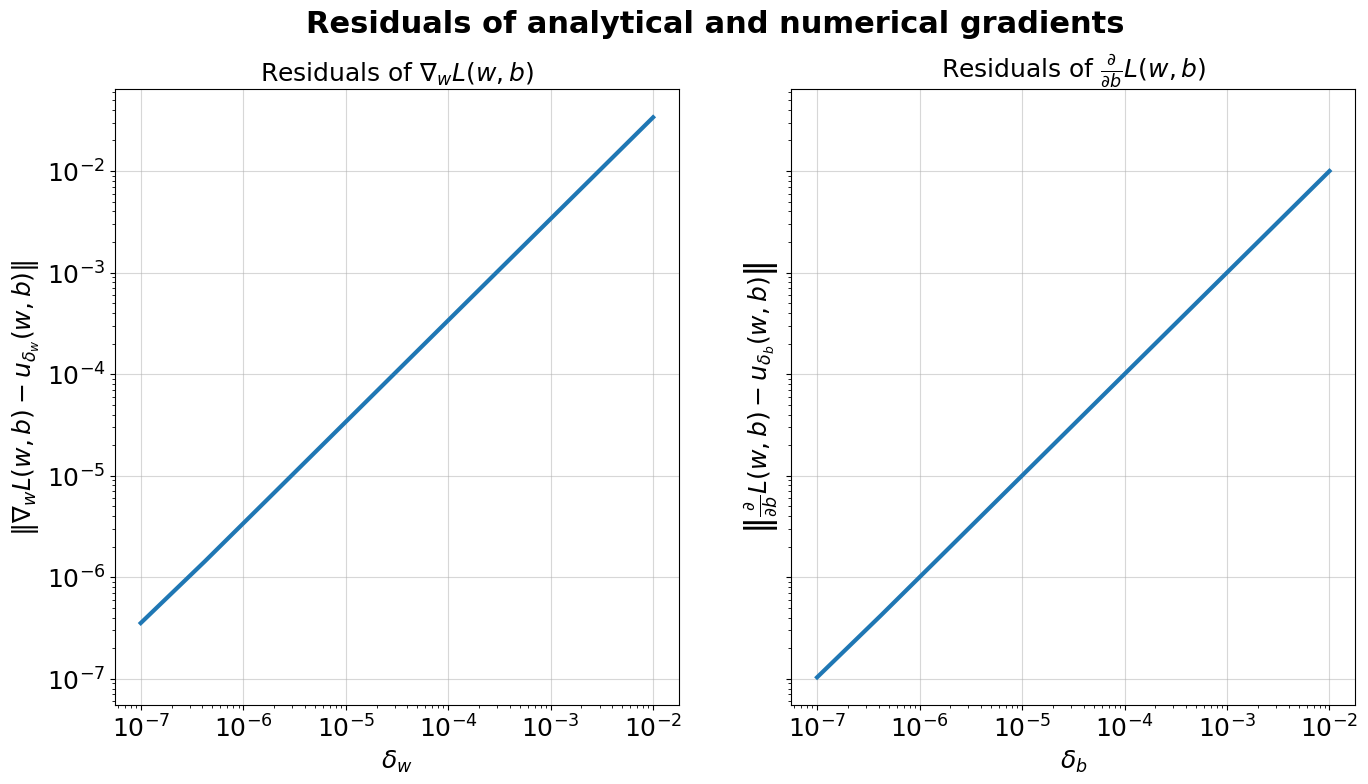

In [ ]:
# Q2
X_train = df_train_subset.drop('contamination_level', axis=1).values
y_train = df_train_subset['contamination_level'].values
compare_gradients(X_train, y_train, deltas=np.logspace(-7, -2, 9))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)

  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 0.07462522986052329, Best validation loss = 0.09458288811963658
lr size = 1e-08, Best train loss = 0.07462316342813965, Best validation loss = 0.09458025860585724
lr size = 1e-07, Best train loss = 0.07460250607227764, Best validation loss = 0.09455397200693205
lr size = 1e-06, Best train loss = 0.07439662715810288, Best validation loss = 0.0942919573539842
lr size = 1e-05, Best train loss = 0.07240520547936286, Best validation loss = 0.0917544587807471
lr size = 0.0001, Best train loss = 0.057584461705458986, Best validation loss = 0.07268564808492821
lr size = 0.001, Best train loss = 0.02108060626048272, Best validation loss = 0.02581462507911174
lr size = 0.01, Best train loss = 0.007163269742782757, Best validation loss = 0.008606325864940562
lr size = 0.1, Best train loss = 0.007274907659857861, Best validation loss = 0.008593091530980724


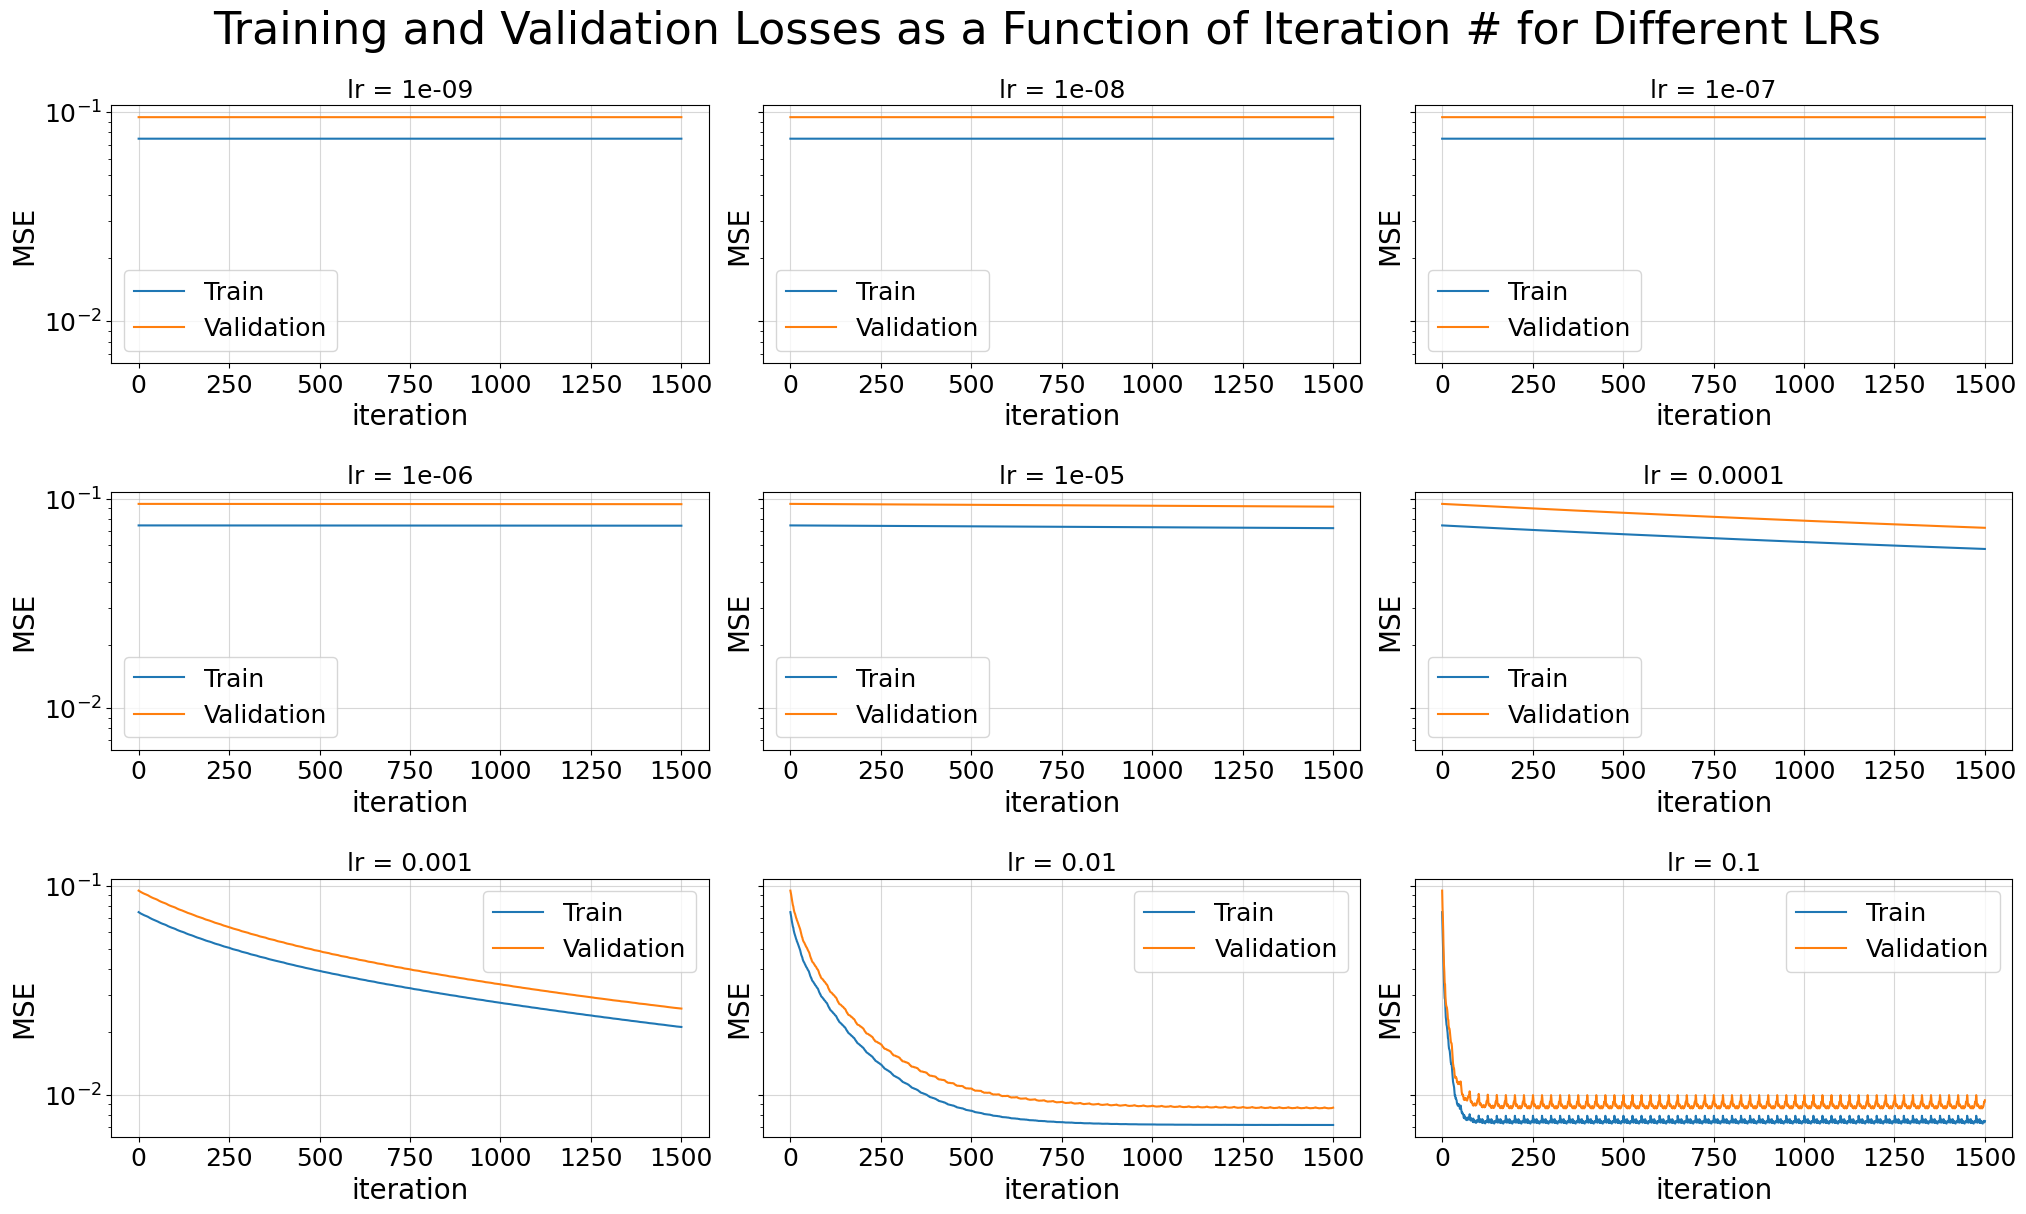

In [ ]:
# Q3
X_val = df_validation_subset.drop('contamination_level', axis=1).values
y_val = df_validation_subset['contamination_level'].values
test_lr(X_train, y_train, X_val, y_val, title="Training and Validation Losses as a Function of Iteration # for Different LRs")

In [ ]:
# Q4 dummy regressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

dummy_regressor = DummyRegressor(strategy="mean")
whole_X_train = train_df_prepared.drop('contamination_level', axis=1)
whole_y_train = train_df_prepared['contamination_level']
cv_results = cross_validate(dummy_regressor, whole_X_train, whole_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Convert negative MSE to positive for readability
train_mse_scores = -cv_results['train_score']
test_mse_scores = -cv_results['test_score']

# Print the cross-validated MSE scores
print("Mean cross-validated training MSE:", np.mean(train_mse_scores))
print("Mean cross-validated testing MSE:", np.mean(test_mse_scores))

Mean cross-validated training MSE: 0.0688990895917947
Mean cross-validated testing MSE: 0.0689330855903038


In [ ]:
# retrain the dummy regressor on the whole training set

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(whole_X_train, whole_y_train)

DummyRegressor()

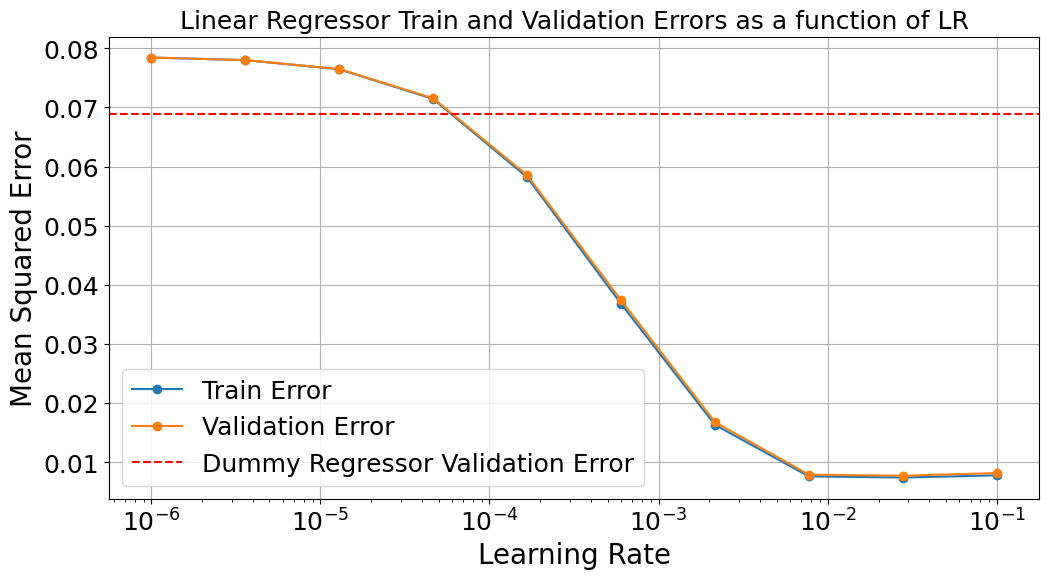

Optimal Learning Rate: 0.02782559402207126
Cross-validated Training Error with Optimal LR: 0.007411967294937578
Cross-validated Validation Error with Optimal LR: 0.007721683642419192


In [ ]:
# Q5 CV on LinearRegressor, tuning LR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

# LR range
learning_rates = np.logspace(-6, -1, 10)

train_errors = []
validation_errors = []

# baseline
dummy_validation_scores = test_mse_scores

for lr in learning_rates:
    linear_regressor = LinearRegressor(lr=lr)
    cv_results = cross_validate(linear_regressor, whole_X_train, whole_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    train_errors.append(np.mean(cv_results['train_score']))
    validation_errors.append(np.mean(cv_results['test_score']))

# Convert negative MSE to positive for readability
train_errors = [-score for score in train_errors]
validation_errors = [-score for score in validation_errors]

# Plot the cross-validated train and validation errors
plt.figure(figsize=(12, 6))
plt.semilogx(learning_rates, train_errors, label='Train Error', marker='o')
plt.semilogx(learning_rates, validation_errors, label='Validation Error', marker='o')
plt.axhline(y=np.mean(dummy_validation_scores), color='r', linestyle='--', label='Dummy Regressor Validation Error')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Linear Regressor Train and Validation Errors as a function of LR')
plt.legend()
plt.grid(True)
plt.show()

# Find the best learning rate
optimal_lr_idx = np.argmin(validation_errors)
optimal_lr = learning_rates[optimal_lr_idx]
optimal_validation_error = validation_errors[optimal_lr_idx]

# Print the optimal learning rate and corresponding validation error
print(f'Optimal Learning Rate: {optimal_lr}')
print(f'Cross-validated Training Error with Optimal LR: {train_errors[optimal_lr_idx]}')
print(f'Cross-validated Validation Error with Optimal LR: {optimal_validation_error}')

In [ ]:
# Train the LinearRegressor with the optimal learning rate on the entire training set
optimal_linear_regressor = LinearRegressor(lr=optimal_lr)
optimal_linear_regressor.fit(whole_X_train, whole_y_train)

LinearRegressor(lr=0.02782559402207126)

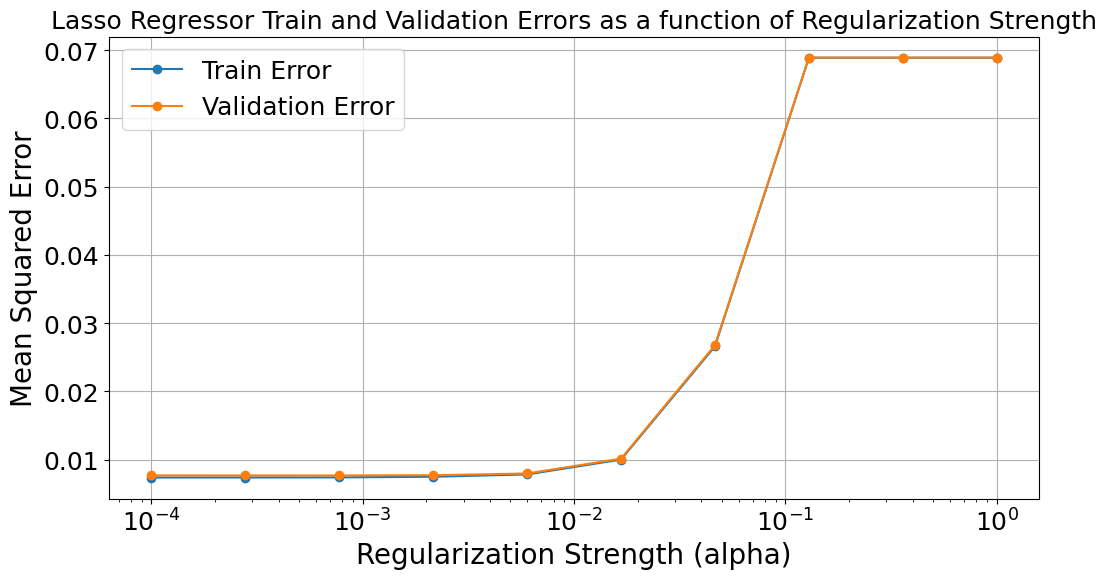

Optimal Regularization Strength: 0.000774263682681127
Cross-validated Training Error with Optimal Alpha: 0.007400995595221864
Cross-validated Validation Error with Optimal Alpha: 0.007686010910628822


In [ ]:
# Q7
from sklearn.linear_model import Lasso

# Define the range of regularization strengths
regularization_strengths = np.logspace(-4, 0, 10)

train_errors = []
validation_errors = []

# Perform cross-validation for each regularization strength
for alpha in regularization_strengths:
    lasso_regressor = Lasso(alpha=alpha, fit_intercept=True)
    cv_results = cross_validate(lasso_regressor, whole_X_train, whole_y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

    # Convert negative MSE to positive for readability
    train_errors.append(-np.mean(cv_results['train_score']))
    validation_errors.append(-np.mean(cv_results['test_score']))

# Plot the cross-validated train and validation errors
plt.figure(figsize=(12, 6))
plt.semilogx(regularization_strengths, train_errors, label='Train Error', marker='o')
plt.semilogx(regularization_strengths, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regressor Train and Validation Errors as a function of Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

# Find the best regularization strength
optimal_alpha_idx = np.argmin(validation_errors)
optimal_alpha = regularization_strengths[optimal_alpha_idx]
optimal_validation_error = validation_errors[optimal_alpha_idx]

# Print the optimal regularization strength and corresponding validation error
print(f'Optimal Regularization Strength: {optimal_alpha}')
print(f'Cross-validated Training Error with Optimal Alpha: {train_errors[optimal_alpha_idx]}')
print(f'Cross-validated Validation Error with Optimal Alpha: {optimal_validation_error}')

In [ ]:
# Train the Lasso regressor with the optimal regularization strength on the entire training set
optimal_lasso_regressor = Lasso(alpha=optimal_alpha, fit_intercept=True)
optimal_lasso_regressor.fit(whole_X_train, whole_y_train)

Lasso(alpha=0.000774263682681127)

In [ ]:
# Q9

coefficients = optimal_lasso_regressor.coef_
feature_names = whole_X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)

top_5_features = coeff_df.head(5)

print("Top 5 features with the largest coefficients:")
print(top_5_features[['Feature', 'Coefficient']])

Top 5 features with the largest coefficients:
         Feature  Coefficient
8         PCR_04     0.462614
4   sugar_levels     0.126135
6         PCR_02    -0.077948
10        PCR_06    -0.047372
13        PCR_09    -0.010335


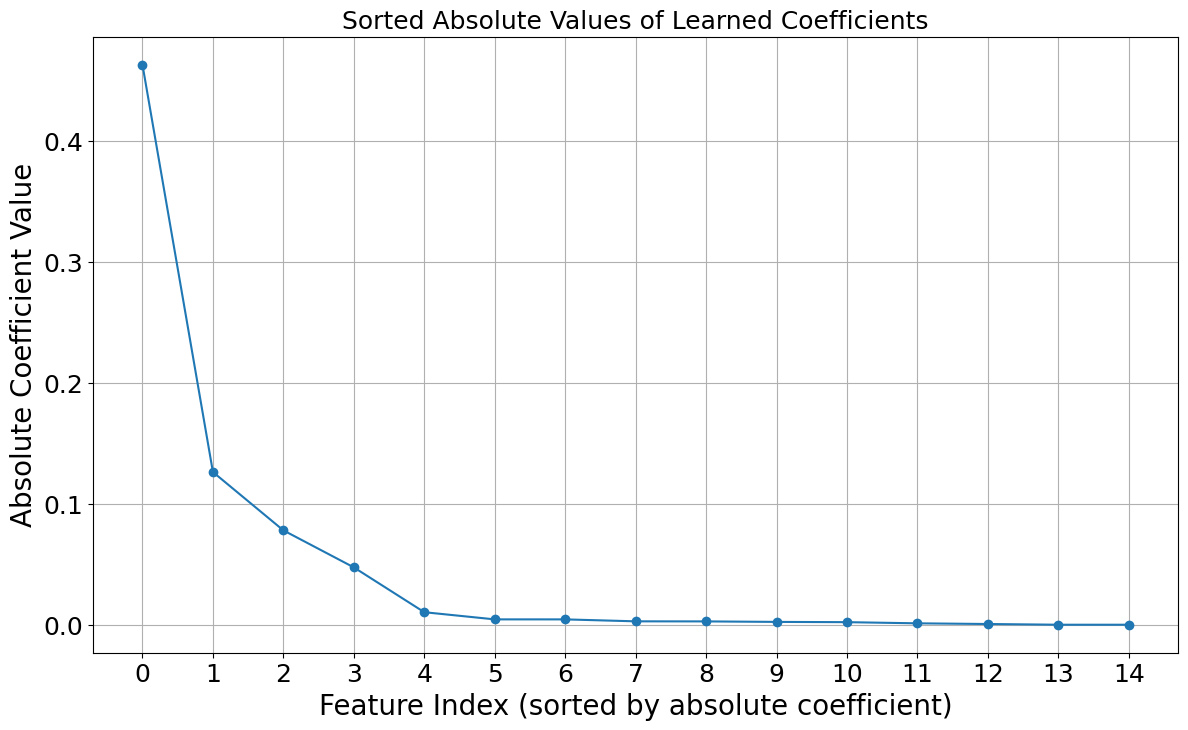

In [ ]:
# Q10

coefficients = optimal_lasso_regressor.coef_
feature_names = whole_X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)

# Get the sorted coefficients and their indices
sorted_coefficients = coeff_df['AbsCoefficient'].values
indices = np.arange(len(sorted_coefficients))

# Plot the sorted absolute coefficients as a function plot
plt.figure(figsize=(14, 8))
plt.plot(indices, sorted_coefficients, marker='o')
plt.xlabel('Feature Index (sorted by absolute coefficient)')
plt.ylabel('Absolute Coefficient Value')
plt.title('Sorted Absolute Values of Learned Coefficients')
plt.grid()

# Set x-axis ticks to be integer values
plt.xticks(np.arange(0, len(sorted_coefficients), step=1))

plt.show()

In [ ]:
#Section 4:
#Q14
train_df_poly = train_df_prepared[['PCR_04', 'PCR_06', 'contamination_level']]
train_df_poly.head()

,PCR_04,PCR_06,contamination_level
1003,0.212614,0.927673,-0.000927
1186,-0.131769,-1.369356,0.227222
299,0.156800,-0.595310,0.227181
628,-0.038783,-0.444409,-0.029356
812,-0.551861,-1.580146,-0.183460


In [ ]:
def plot3d(df, colX:str, colY:str, colZ:str, title:str, predictions=None):
  fig = plt.figure(figsize=(20, 7))
  axes = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if predictions is not None:
      ax.scatter3D(df[colX], df[colY], predictions, color=palette[1], s=3,)
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1,
                   alpha=0.35, depthshade=False)
    else:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i)

  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  plt.legend()
  plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-1-79eef85baf05>, line 10)

<ipython-input-26-8d1e5cb89966>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


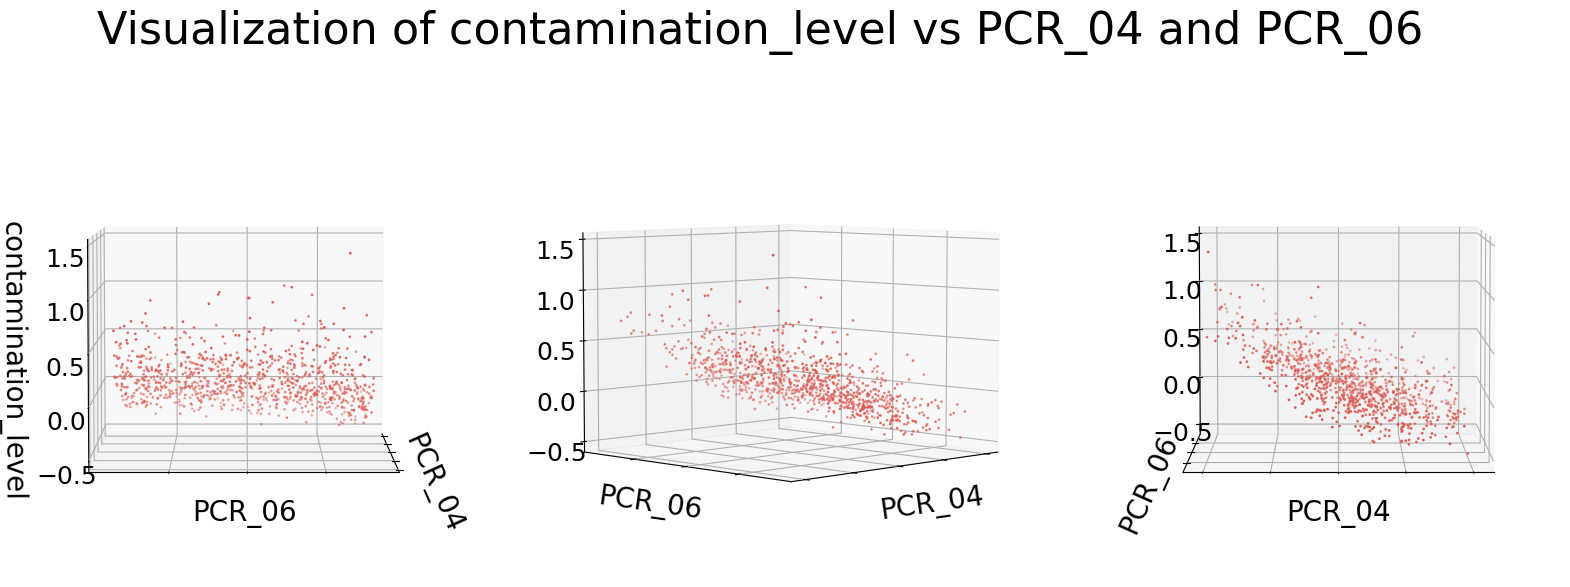

In [ ]:
plot3d(train_df_poly, "PCR_04", "PCR_06", "contamination_level", "Visualization of contamination_level vs PCR_04 and PCR_06")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

poly_reg = Pipeline([('feature_mapping', PolynomialFeatures(degree=4, include_bias=True)),
                     ('normalization', MinMaxScaler(feature_range=(-1,1))),
                     ('Lasso', Lasso(fit_intercept=True))
                    ])

In [ ]:
X_train_pcr_04_06 = train_df_poly[['PCR_04', 'PCR_06']]
y_train_pcr_04_06 = train_df_poly['contamination_level']

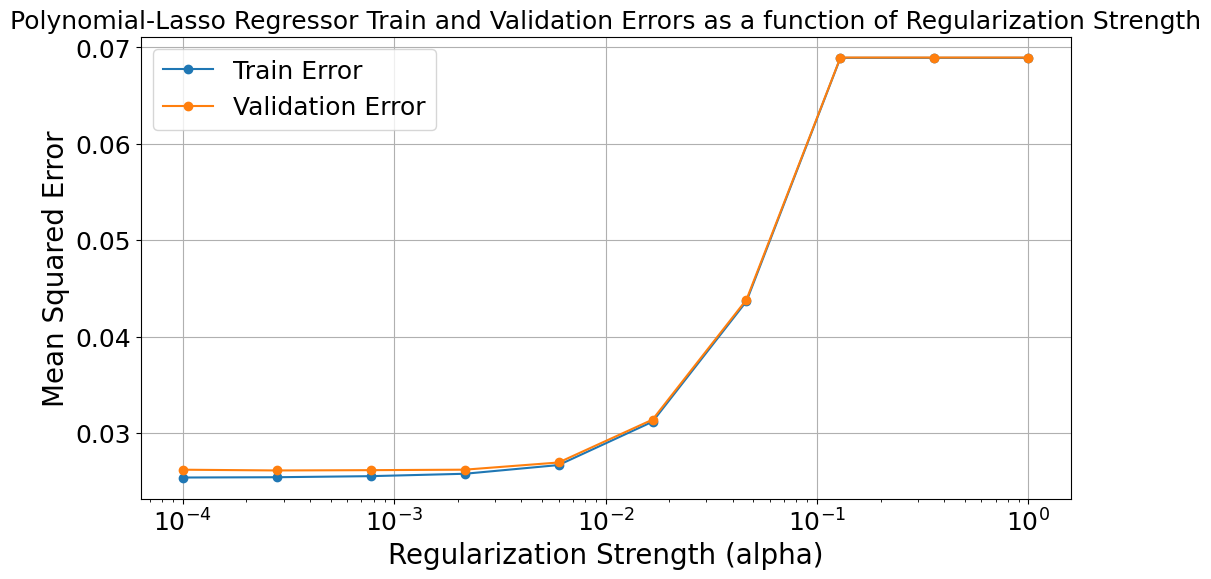

Optimal Regularization Strength: 0.0002782559402207126
Cross-validated Training Error with Optimal Alpha: 0.025422428995198317
Cross-validated Validation Error with Optimal Alpha: 0.026124220247787683


In [ ]:
# Q15
# Define the range of regularization strengths
regularization_strengths = np.logspace(-4, 0, 10)

train_errors = []
validation_errors = []

# Perform cross-validation for each regularization strength
for alpha in regularization_strengths:
    poly_reg.set_params(Lasso__alpha=alpha)
    cv_results = cross_validate(poly_reg, X_train_pcr_04_06, y_train_pcr_04_06, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

    # Convert negative MSE to positive for readability
    train_errors.append(-np.mean(cv_results['train_score']))
    validation_errors.append(-np.mean(cv_results['test_score']))

# Plot the cross-validated train and validation errors
plt.figure(figsize=(12, 6))
plt.semilogx(regularization_strengths, train_errors, label='Train Error', marker='o')
plt.semilogx(regularization_strengths, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial-Lasso Regressor Train and Validation Errors as a function of Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

# Find the best regularization strength
optimal_alpha_idx = np.argmin(validation_errors)
optimal_alpha = regularization_strengths[optimal_alpha_idx]
optimal_validation_error = validation_errors[optimal_alpha_idx]

# Print the optimal regularization strength and corresponding validation error
print(f'Optimal Regularization Strength: {optimal_alpha}')
print(f'Cross-validated Training Error with Optimal Alpha: {train_errors[optimal_alpha_idx]}')
print(f'Cross-validated Validation Error with Optimal Alpha: {optimal_validation_error}')

In [ ]:
# Train the Lasso regressor with the optimal regularization strength on the entire training set
optimal_poly_lasso_regressor = Pipeline([('feature_mapping', PolynomialFeatures(degree=4, include_bias=True)),
                                         ('normalization', MinMaxScaler(feature_range=(-1,1))),
                                         ('Lasso', Lasso(alpha=optimal_alpha, fit_intercept=True))
                                        ])
optimal_poly_lasso_regressor.fit(X_train_pcr_04_06, y_train_pcr_04_06)

Pipeline(steps=[('feature_mapping', PolynomialFeatures(degree=4)),
                ('normalization', MinMaxScaler(feature_range=(-1, 1))),
                ('Lasso', Lasso(alpha=0.0002782559402207126))])

<ipython-input-40-8d1e5cb89966>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


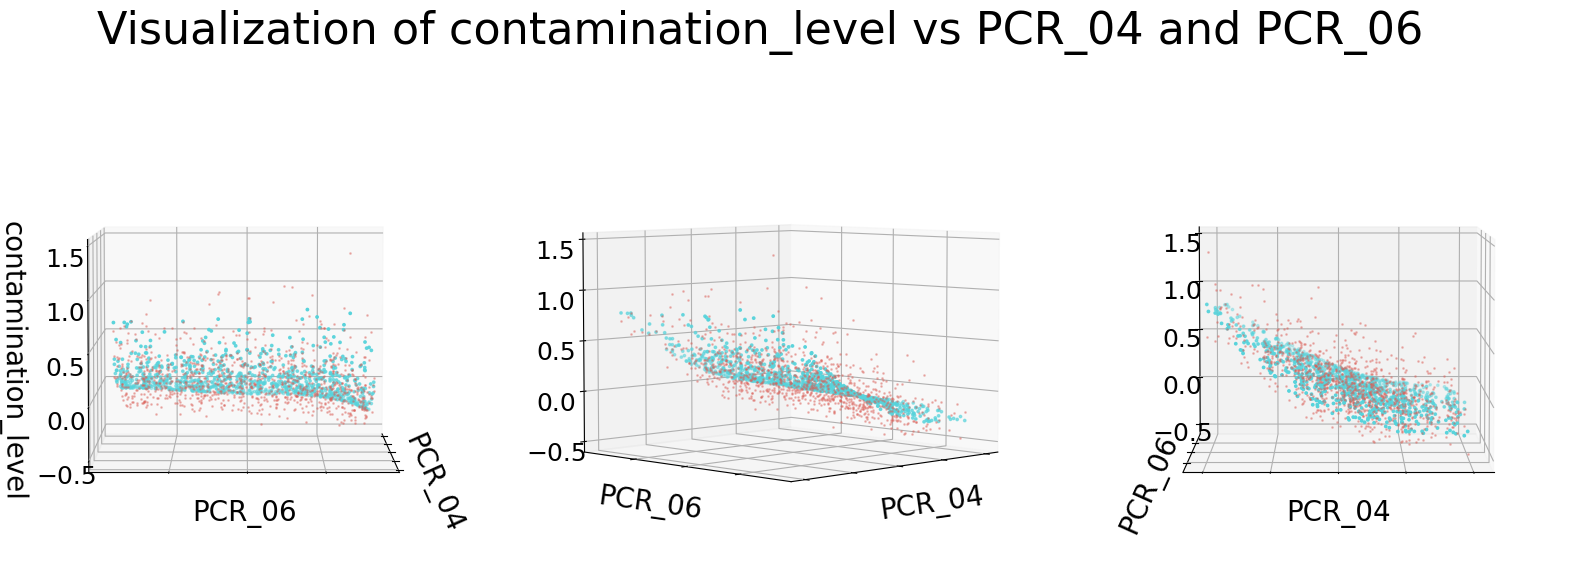

In [ ]:
# Q16
plot3d(train_df_poly, "PCR_04", "PCR_06", "contamination_level", "Visualization of contamination_level vs PCR_04 and PCR_06", predictions=optimal_poly_lasso_regressor.predict(X_train_pcr_04_06))

In [ ]:
#Section 5:
boosted_train_df = train_df_prepared[["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_09", "PCR_10", "sugar_levels", "contamination_level"]]
boosted_whole_X_train = boosted_train_df.drop('contamination_level', axis=1)
boosted_whole_y_train = boosted_train_df['contamination_level']

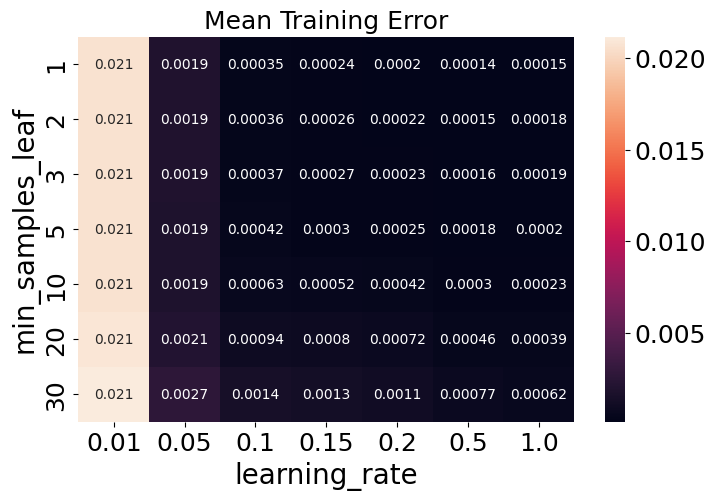

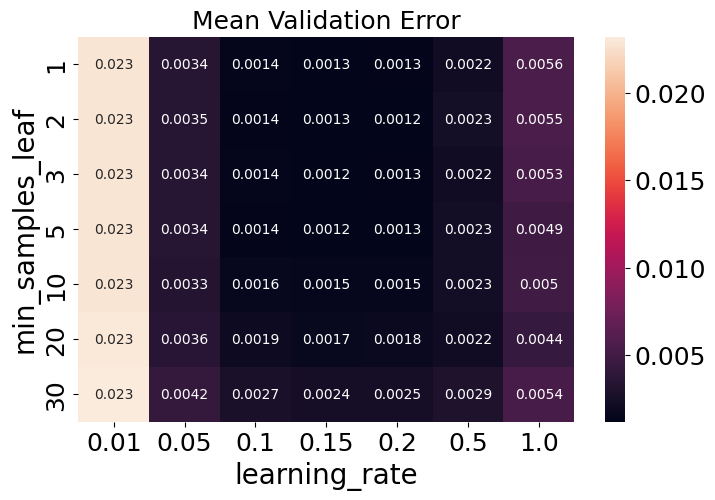

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection


gbm_model = Pipeline([('GBM', GradientBoostingRegressor(loss="huber"))])

param_grid = {
    'GBM__learning_rate': [1, 0.5, 0.2, 0.15, 0.1, 0.05, 0.01],
    'GBM__min_samples_leaf': [1, 2, 3, 5, 10, 20, 30],
}

grid_search = model_selection.GridSearchCV(gbm_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(boosted_whole_X_train, boosted_whole_y_train)

#Visualize
results = grid_search.cv_results_

# Extract relevant data into a DataFrame
data = pd.DataFrame({
    'learning_rate': results['param_GBM__learning_rate'],
    'min_samples_leaf': results['param_GBM__min_samples_leaf'],
    'mean_train_score': -results['mean_train_score'],
    'mean_test_score': -results['mean_test_score']
})
# Reshape the data into a pivot table format for the heatmap
heatmap_data = data.pivot(index='min_samples_leaf', columns='learning_rate', values='mean_train_score')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('learning_rate')
plt.ylabel('min_samples_leaf')
plt.title('Mean Training Error')
plt.show()

heatmap_data = data.pivot(index='min_samples_leaf', columns='learning_rate', values='mean_test_score')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('learning_rate')
plt.ylabel('min_samples_leaf')
plt.title('Mean Validation Error')
plt.show()

In [ ]:
# Train the GBM regressor with the optimal regularization strength on the entire training set
best_params = grid_search.best_params_
print(f"Best Params: Learning Rate {best_params['GBM__learning_rate']}, Min Samples Leaves: {best_params['GBM__min_samples_leaf']}")
best_validation_error = -grid_search.best_score_  # according to documentation: Mean cross-validated score of the best_estimator
print(f"Best params validation error: {best_validation_error}")

best_index = grid_search.best_index_
best_train_error = -results['mean_train_score'][best_index]
print(f"Best params training error: {best_train_error}")

Best Params: Learning Rate 0.15, Min Samples Leaves: 3
Best params validation error: 0.001192009291199205
Best params training error: 0.00027477011658974624


In [ ]:
optimal_gbm_regressor = GradientBoostingRegressor(loss="huber", learning_rate=best_params["GBM__learning_rate"], min_samples_leaf=best_params["GBM__min_samples_leaf"])
optimal_gbm_regressor.fit(boosted_whole_X_train, boosted_whole_y_train)

GradientBoostingRegressor(learning_rate=0.15, loss='huber', min_samples_leaf=3)

In [ ]:
#Q20

whole_X_test = test_df_prepared.drop('contamination_level', axis=1)
whole_y_test = test_df_prepared['contamination_level']

test_df_poly = test_df_prepared[['PCR_04', 'PCR_06', 'contamination_level']]
X_test_pcr_04_06 = test_df_poly[['PCR_04', 'PCR_06']]
y_test_pcr_04_06 = test_df_poly['contamination_level']

boosted_test_df = test_df_prepared[["PCR_01", "PCR_02", "PCR_03", "PCR_04", "PCR_05", "PCR_06", "PCR_09", "PCR_10", "sugar_levels", "contamination_level"]]
boosted_X_test = boosted_test_df.drop('contamination_level', axis=1)
boosted_y_test = boosted_test_df['contamination_level']

#Validation MSE:

all_test_mse = {"dummy": mean_squared_error(whole_y_test, dummy_regressor.predict(whole_X_test)),
                "linear": mean_squared_error(whole_y_test, optimal_linear_regressor.predict(whole_X_test)),
                "linear_lasso": mean_squared_error(whole_y_test, optimal_lasso_regressor.predict(whole_X_test)),
                "poly_lasso": mean_squared_error(y_test_pcr_04_06, optimal_poly_lasso_regressor.predict(X_test_pcr_04_06)),
                "GBM": mean_squared_error(boosted_y_test, optimal_gbm_regressor.predict(boosted_X_test))
                }

print(f'Final Test MSE For all models: {all_test_mse}')
best_model = min(all_test_mse, key=lambda model: all_test_mse[model])
best_mse = all_test_mse[best_model]
print(f'best model: {best_model}\ntest MSE: {best_mse}')

Final Test MSE For all models: {'dummy': 0.06537898624157094, 'linear': 0.007741968376029838, 'linear_lasso': 0.007672926096355805, 'poly_lasso': 0.02383837955951703, 'GBM': 0.0015024436162151182}
best model: GBM
test MSE: 0.0015024436162151182
